# 데이터 집계와 시각화

### 주요 내용

1. 건수, 합계 평균 등 집계값 계산
2. 히스토그램, 상자그림, 막대그래프 등 그래프 작성 
3. 정렬 및 피벗테이블 활용

<br>

### 목표 
1. 집계값을 계산할 수 있다.
2. 적절한 그래프를 작성하고 올바르게 해석할 수 있다.
3. 피벗 테이블 등 다양한 방법으로 집계하고, 결과값을 적절히 정렬할 수 있다. 


<br>
<hr>
<br>

## 예제 및 실습 데이터 불러오기

In [ ]:
# 데이터 불러오기
import pandas as pd
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

In [ ]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

In [ ]:
#df_sp.describe()
#df_sp.describe(include='number')
df_sp.describe(include='object')

<br>

## 1. 수치형 변수의 집계값과 히스토그램

하나의 수치형 변수로 합계, 평균과 같은 집계값을 계산할 수 있고 히스토그램으로 분포를 확인


<br>

### 1.1. 수치형 변수의 집계값 계산

수치형 변수를 선택한 다음 sum( ), mean( ) 같은 메서드를 활용해서 단순한 집계값을 계산  
먼저 변수를 선택하고 다양한 집계 함수를 메서드로 활용

In [ ]:
# 관심 변수 선택
df_ins['charges']

In [ ]:
# 수치형 변수의 집계값 계산
    # mean( ) : 수치형 Series의 메서드
df_ins['charges'].mean()

In [ ]:
df_ins['charges'].sum()

In [ ]:
# 분산과 표준편차계산
df_ins['charges'].var(), df_ins['charges'].std()

In [ ]:
# 관측치 수 계산하기
df_ins['charges'].min()

<br>

### 1.2. 히스토그램 그리기

하나의 수치형변수의 분포를 파악하기 위해서 히스토그램을 활용  
Python에서 그래프를 그릴때는 기본적으로 matplotlib 라이브러리를 활용하지만, 좀 더 가독성이 좋고 그래프가 이쁜 seaborn 라이브러리를 추가로 활용   



<br>

#### 1.2.1. pandas의 메서드와 matplotlib을 활용한 그래프

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 가장 간단한 히스토그램과 상자그림
    # DataFrame의 plot 메서드 활용
    # plt.show() : 최종 그래프 출력함수, 생략 가능
df_ins['age'].plot(kind='hist')
plt.show()

In [ ]:
# matplotlib의 hist( )를 활용한 히스토그램 그리기
plt.hist(df_ins['age'])

<br>

#### 1.2.2. seaborn을 활용한 히스토그램

seaborn 라이브러리를 활용하면 그래프를 그리는 명령어가 좀 더 직관적이고 DataFrame 형식을 활용하기 편함

In [ ]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins,
             x='age')

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

1. df_sp에서 'math score'의 평균 계산하기

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



In [ ]:
df_sp['math score'].mean()

In [ ]:
plt.hist(df_sp['math score'])

In [ ]:
sns.histplot(data=df_sp, x='math score')

### 1.3. 분위수와 상자그림

`quantile()`을 활용해서 분위수를 계산  

최솟값(minimum, 0%), Q1(1st Quartile, 25%), 중앙값(median, 50%), Q3(3rd Quartile, 75%), 최댓값(maximum, 100%)을 사분위수(quartile)이라고 부르고, **상자그림(boxplot)** 으로 시각화

In [ ]:
df_ins['charges'].quantile(0.1)

In [ ]:
df_ins['charges'].quantile([0.0, 0.25, 0.5, 0.75, 1.0, 0.8, 0.9])
    ## quantile( ) : 계산할 분위(1.0이 최댓값) 를 리스트로 묶기

In [ ]:
# matplotlib의 boxplot()으로 상자그림 그리기
plt.boxplot(df_ins['charges'])
plt.show()

In [ ]:
# boxplot( )을 활용한상자그림
sns.boxplot(data=df_ins,
            y='charges')

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'reading score'의 상자그림을 seaborn으로 그리기

In [ ]:
df_sp.describe()

In [ ]:
df_sp['reading score'].quantile([0.25, 0.5, 0.75])

In [ ]:
sns.boxplot(data=df_sp, y='reading score')

<br>

## 2. 범주형 변수의 요약과 시각화  

범주형 변수는 정해진 수준(level) 중에 하나의 값을 갖기 때문에 분석 방법이 단순하며 개수를 세면 됨

<br>


### 2.1. 그룹별 건수 계산과 시각화

> SQL에서도 가장 잦은 키워드 조합이 `SELECT COUNT(1) ... GROUP BY ...`입니다.  

범주형 변수/그룹 변수로 수준별 관측치 수를 셀 수 있고, 막대그래프로 표현


In [33]:
# 수준(levels) 및 개수 확인 
df_ins['smoker'].unique()
df_ins['smoker'].drop_duplicates()

0    yes
1     no
Name: smoker, dtype: object

In [34]:
df_ins['smoker'].nunique()

2

<br>

#### 2.1.1. 수준별 관측치 수 계산 및 막대그래프 작성

In [35]:
# 수준별 관측치 수 세기
df_ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: >

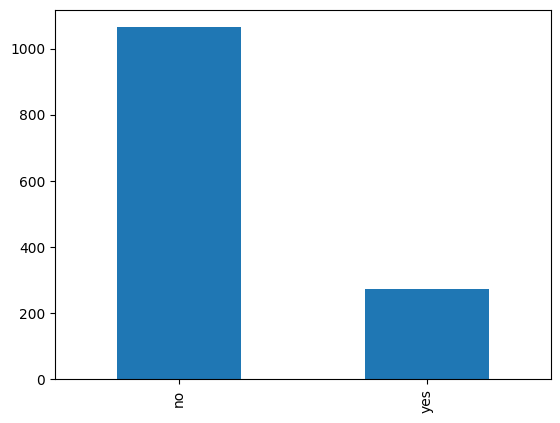

In [36]:
# plot( ) 메서드를 활용한 막대그래프 
df_ins['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker', ylabel='count'>

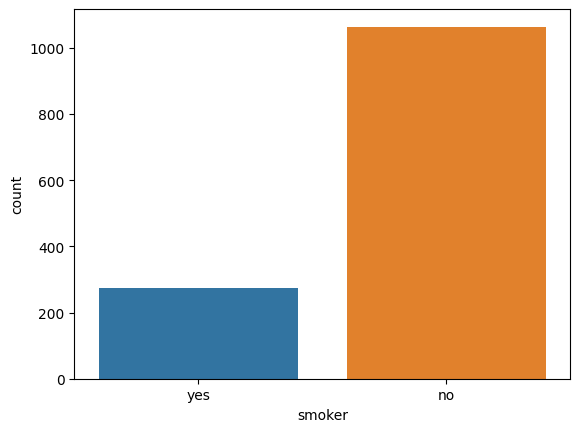

In [37]:
# seaborn을 활용한 막대그래프
sns.countplot(data=df_ins,
              x='smoker')

#### [실습]

1. 데이터 df_sp에서 'parental level of education'별 관측치 수를 계산하고 matplotlib 막대그래프 그리기
2. 'race/ethnicity'별 관측치 수를 계산하고, seaborn 막대그래프로 그리기

In [38]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: >

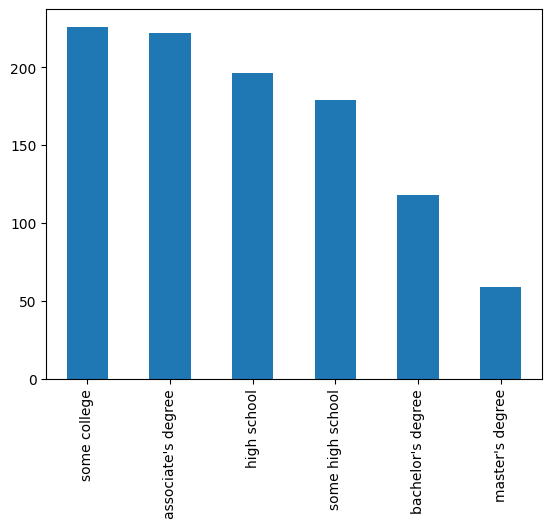

In [40]:
df_sp['parental level of education'].value_counts().plot(kind='bar')

In [44]:
count = df_sp['parental level of education'].value_counts()
plt.bar(count.index, count)

In [45]:
count.index

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

<BarContainer object of 6 artists>

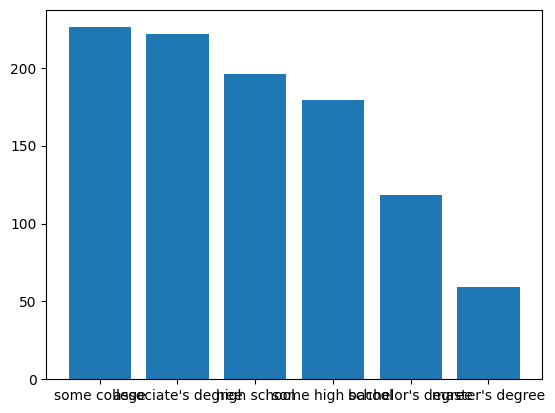

In [46]:
plt.bar(count.index, count)

In [41]:
df_sp['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

<Axes: xlabel='race/ethnicity', ylabel='count'>

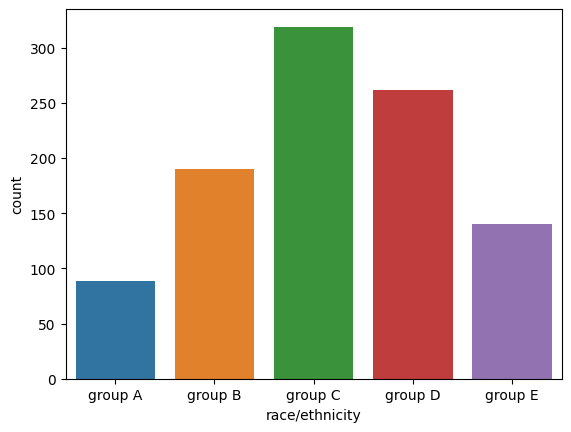

In [43]:
sns.countplot(data=df_sp, x='race/ethnicity', order=['group A', 'group B', 'group C', 'group D', 'group E'])

<Axes: xlabel='race/ethnicity', ylabel='count'>

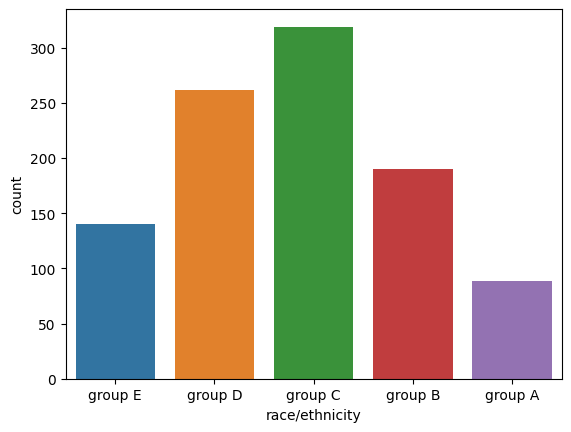

In [52]:
sns.countplot(data=df_sp, x='race/ethnicity', order=df_sp['race/ethnicity'].drop_duplicates().sort_values(ascending=False))

<br>  

## 3. 산점도와 상관계수의 활용 

두 수치형 변수의 관계를 파악하기 위해서 **산점도(scatterplot)** 를 그리고 **상관계수(correlation coefficient)** 를 계산  

In [53]:
# 예제 데이터 불러오기
    # 아빠키와 아들키
df_heights = pd.read_csv('data/heights.csv')
df_heights

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


In [68]:
print(10*50)
print(20*50)

500
1000


171.92522603599258 174.45753692820037


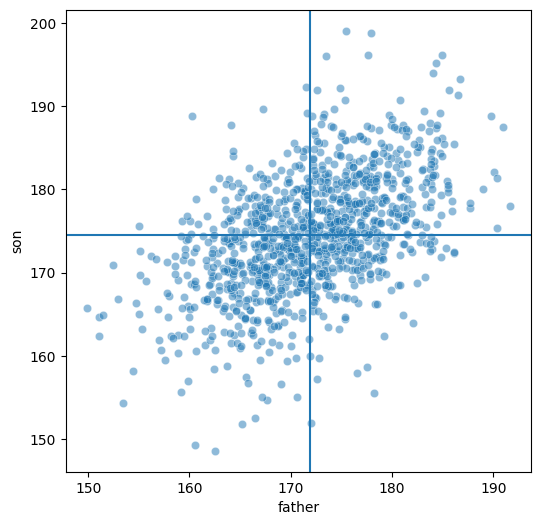

In [64]:
# seaborn으로 산점도 그리기
mean_f = df_heights['father'].mean()
mean_s = df_heights['son'].mean()
print(mean_f, mean_s)

plt.figure(figsize=(6,6))

sns.scatterplot(data=df_heights, 
                x='father', 
                y='son', 
                alpha=0.5)

plt.axhline(mean_s) # 수평선 추가
plt.axvline(mean_f) # 수직선 추가
plt.show()

In [62]:
# 공분산 계산하기
df_heights[['father','son']].cov()

,father,son
father,48.608307,24.989192
son,24.989192,51.113092


In [63]:
# 상관계수 계산하기
df_heights[['father','son']].corr()

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


#### [실습] 두 수치형 변수의 관계 탐색
 
1. df_sp에서 'math score'와 'reading score'의 산점도를 그리고 상관계수 계산하기
2. df_ins에서 'bmi'와 'charges'의 산점도를 그리고 상관계수 계산하기
3. (같이) df_ins에서 데이터 부분 선택을 활용해서 'bmi'와 'charges'의 상관계수를 'smoker'별로 나눠 계산하기

<Axes: xlabel='writing score', ylabel='reading score'>

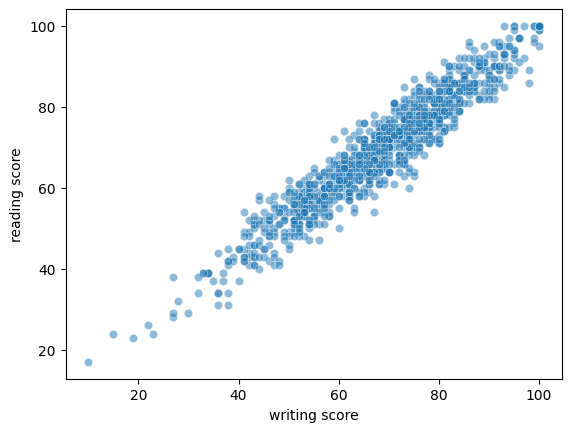

In [76]:
sns.scatterplot(data=df_sp, x='writing score', y='reading score', alpha=0.5)

In [75]:
df_sp[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [79]:
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='bmi', ylabel='charges'>

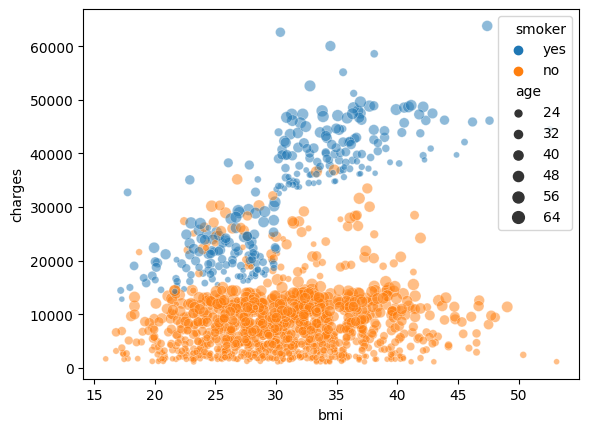

In [87]:
sns.scatterplot(data=df_ins, x='bmi', y='charges', alpha=0.5, hue='smoker', size='age')

In [80]:
df_ins[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [86]:
df_ins['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [84]:
df_ins[ df_ins['smoker'] == 'yes' ][['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


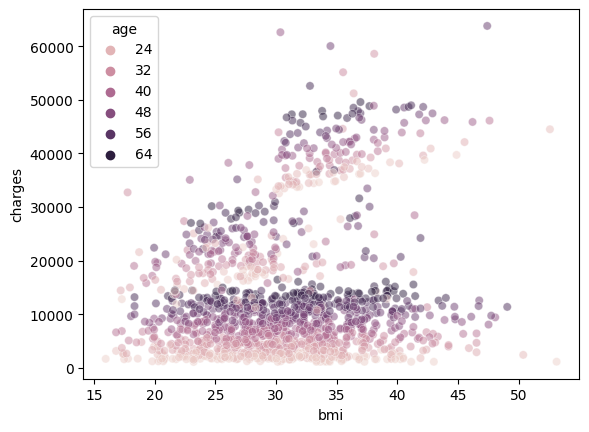

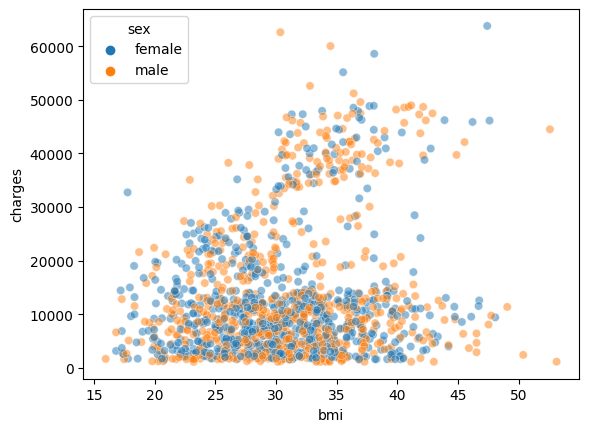

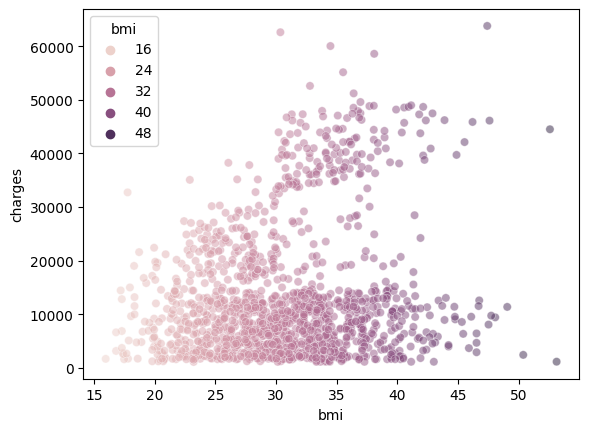

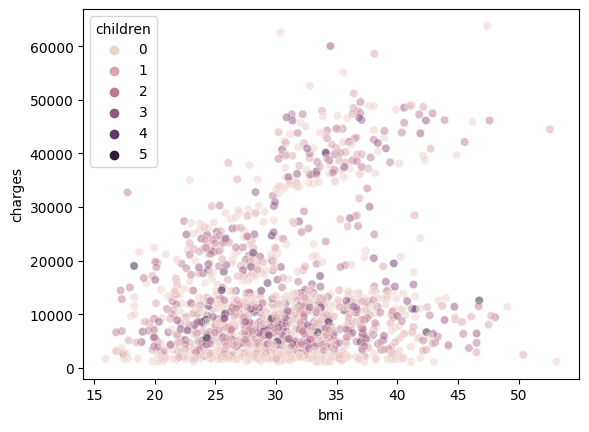

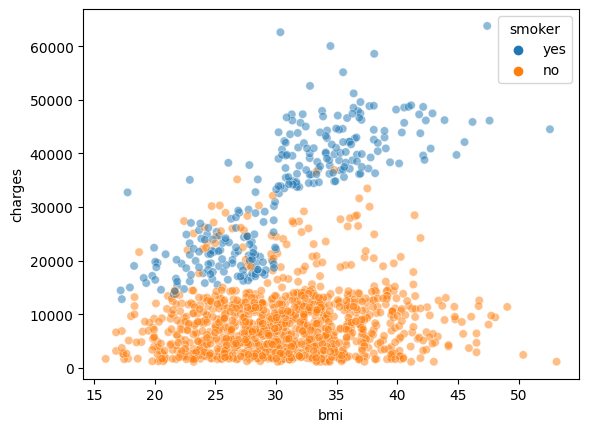

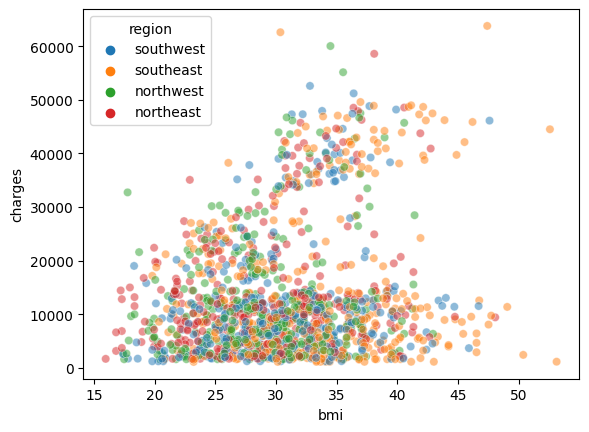

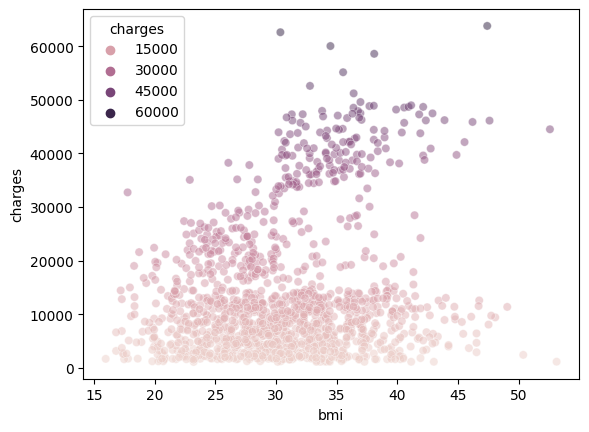

In [99]:
for var in df_ins.columns:
   # plt.figure(figsize=(2,2))
    sns.scatterplot(data=df_ins, x='bmi', y='charges', alpha=0.5, hue=var)
    plt.show()

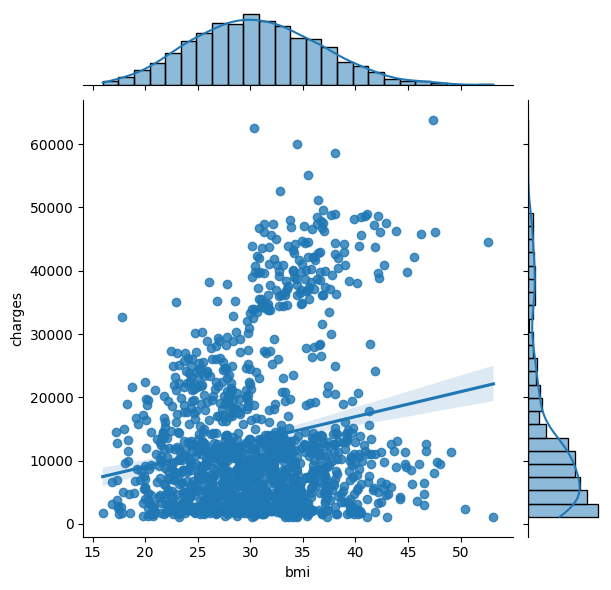

In [96]:
sns.jointplot(x="bmi", y="charges", data=df_ins, kind="reg")

30.66339686098655 13270.422265141257


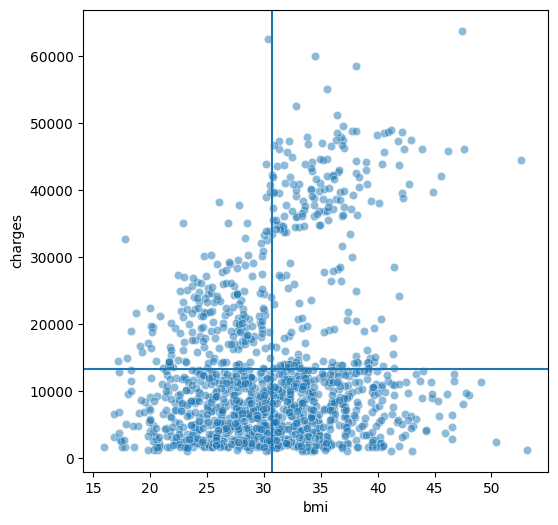

In [98]:
mean_f = df_ins['bmi'].mean()
mean_s = df_ins['charges'].mean()
print(mean_f, mean_s)

plt.figure(figsize=(6,6))

sns.scatterplot(data=df_ins, 
                x='bmi', 
                y='charges', 
                alpha=0.5)

plt.axhline(mean_s) # 수평선 추가
plt.axvline(mean_f) # 수직선 추가
plt.show()

<br>


## 4. 그룹별 집계값의 계산과 분포 비교

범주형 변수를 그룹처럼 활용해서 그룹별 평균을 계산하고, 그룹별 상자그림을 그려서 그룹간 분포를 비교  
한 변수의 집계에서 `groupby()`를 추가하면 되고, 필요에 따라 `agg()`를 활용 가능 

In [100]:
# 전체 평균 계산
df_ins['charges'].mean()

13270.422265141257

In [101]:
# 그룹별 평균 계산
df_ins.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [102]:
# 그룹별 평균 계산(DataFrame 형식으로 출력)
df_ins.groupby('sex', as_index=False)['charges'].mean()

,sex,charges
0,female,12569.578844
1,male,13956.751178


<br>

다양한 그룹 집계값의 계산 예제

In [103]:
# 여러개 그룹변수를 활용한 평균 계산
df_ins.groupby(['sex', 'smoker'], as_index=False)['charges'].mean()

,sex,smoker,charges
0,female,no,8762.297300
1,female,yes,30678.996276
2,male,no,8087.204731
3,male,yes,33042.005975


In [104]:
# 그룹별 여러 변수의 평균 계산 
df_ins.groupby('sex', as_index=False)[['charges', 'age']].mean()

,sex,charges,age
0,female,12569.578844,39.503021
1,male,13956.751178,38.917160


In [106]:
df_ins.groupby('smoker', as_index=False)[['bmi', 'charges']].corr()

bmi   charges
0 bmi      1.000000  0.084037
  charges  0.084037  1.000000
1 bmi      1.000000  0.806481
  charges  0.806481  1.000000

In [105]:
# 그룹별 한 변수의 여러 집계값 계산
df_ins.groupby('sex', as_index=False)['charges'].agg(['min','max','mean'])

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


In [107]:
# 일반적인 그룹별 집계값 계산
df_ins.groupby('sex', as_index=False).agg({'age':['min','max','mean'], 'charges':['mean', 'median']})

sex age                      charges            
          min max       mean          mean      median
0  female  18  64  39.503021  12569.578844  9412.96250
1    male  18  64  38.917160  13956.751178  9369.61575

<br>

그룹 평균 등에 대응하는 그래프를 활용한 그룹 분포 비교

<Axes: xlabel='charges', ylabel='Count'>

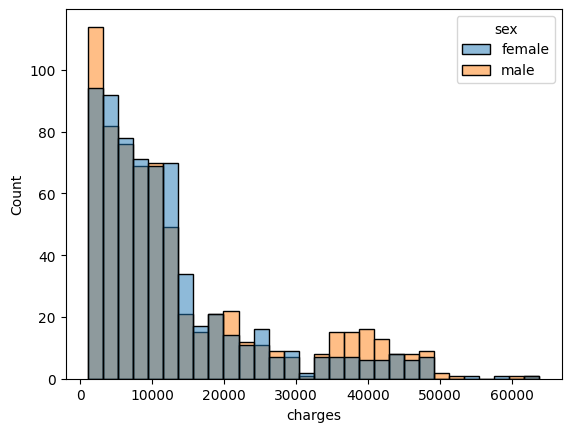

In [108]:
# 겹쳐그린 히스토그램 
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='sex')

<Axes: xlabel='charges', ylabel='Count'>

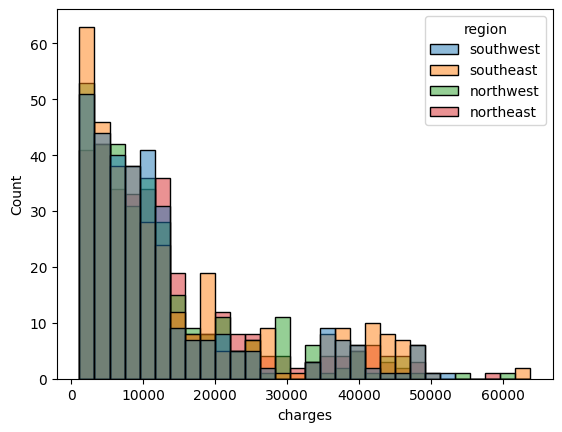

In [109]:
# 많이 겹치기 어려운 히스토그램
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='region')

<Axes: xlabel='charges', ylabel='Count'>

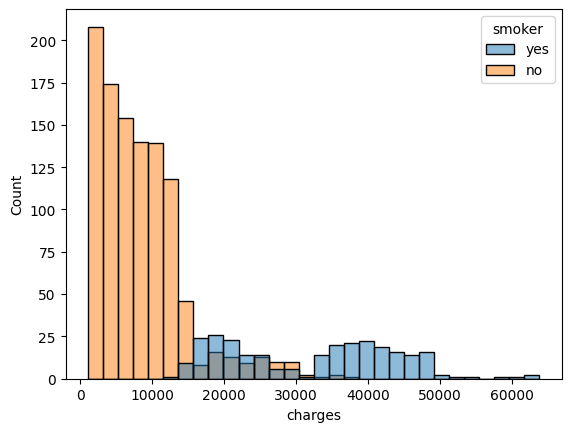

In [110]:
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='smoker')

<Axes: xlabel='sex', ylabel='charges'>

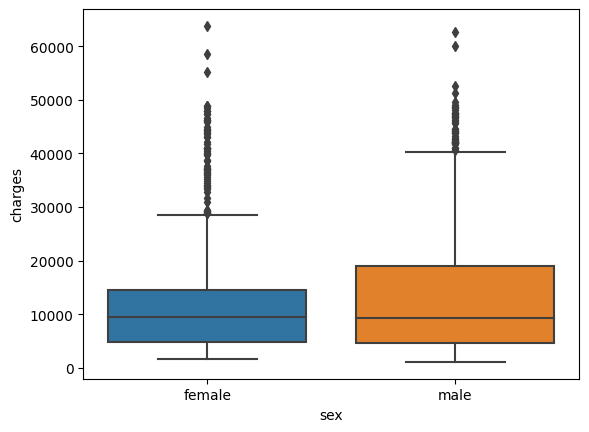

In [111]:
# 그룹별 상자그림 
sns.boxplot(data=df_ins,
            x='sex', 
            y='charges')

<Axes: xlabel='region', ylabel='charges'>

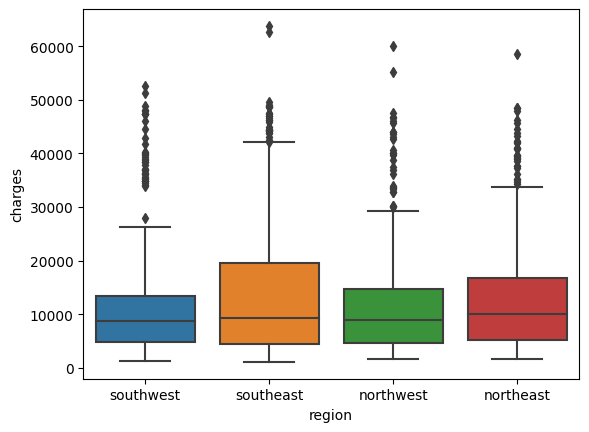

In [112]:
sns.boxplot(data=df_ins,
            x='region', 
            y='charges')

<Axes: xlabel='region', ylabel='charges'>

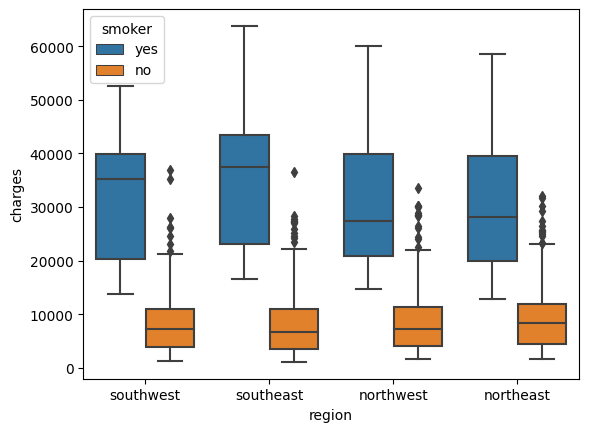

In [113]:
# hue를 추가로 활용한 상자그림
sns.boxplot(data=df_ins,
            x='region', 
            y='charges',
            hue='smoker')

#### [실습] 변수 관계 탐색

1. 데이터 df_sp에서 수치형 변수 하나와 범주형 변수 하나를 선택해서 그룹별 평균을 계산하고 상자그림 그리기
2. 데이터 df_sp에서 두 그룹 변수를 활용해서 `math score`의 평균을 계산하기
3. 2.의 세 변수를 x, y, hue로 활용해 seaborn으로 상자그림 그리기




In [114]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [115]:
df_sp.groupby('race/ethnicity', as_index=False)['math score'].mean()

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


<Axes: xlabel='race/ethnicity', ylabel='math score'>

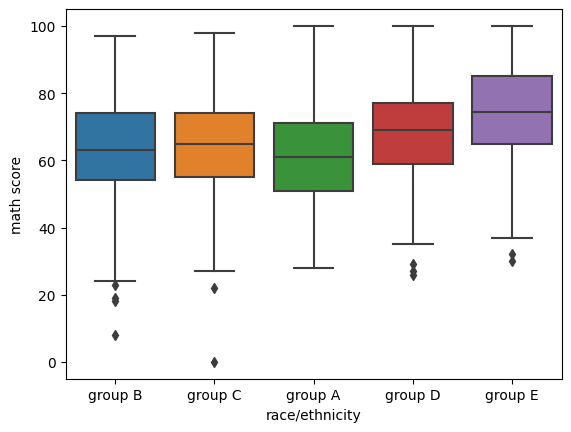

In [116]:
sns.boxplot(data=df_sp, x='race/ethnicity', y='math score')

In [117]:
df_sp.groupby(['race/ethnicity', 'lunch'], as_index=False)['math score'].mean()

,race/ethnicity,lunch,math score
0,group A,free/reduced,55.222222
1,group A,standard,65.981132
2,group B,free/reduced,57.434783
3,group B,standard,66.884298
4,group C,free/reduced,56.412281
5,group C,standard,68.941463
6,group D,free/reduced,61.115789
7,group D,standard,70.916168
8,group E,free/reduced,66.560976
9,group E,standard,76.828283


<Axes: xlabel='race/ethnicity', ylabel='math score'>

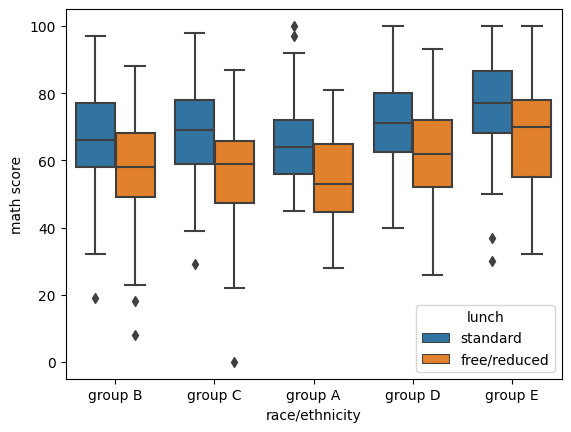

In [118]:
sns.boxplot(data=df_sp, x='race/ethnicity', y='math score', hue='lunch')

## 5. 피벗 테이블과 열지도의 활용

pandas의 *pivot_table()* 을 활용하면 Excel의 피벗테이블과 동일한 표 형태의 집계 가능

In [119]:
# pivot_table()을 활용한 교차표 작성
    ## values : 값 변수
    ## index  : 행 그룹변수
    ## columns: 열 그룹변수 
    ## aggfunc: 집계 함수
pd.pivot_table(df_ins, values='charges', index='sex', columns='region', aggfunc='size')

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [121]:
# pivot_table()을 활용한 평균 피벗테이블
pd.pivot_table(df_ins, values='charges', index='sex', columns='region', aggfunc='mean')
pd.pivot_table(df_ins, 'charges', 'sex', 'region')

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [123]:
df_ins.groupby(['sex', 'region'], as_index=False)['charges'].mean()

,sex,region,charges
0,female,northeast,12953.203151
1,female,northwest,12479.870397
2,female,southeast,13499.669243
3,female,southwest,11274.411264
4,male,northeast,13854.005374
5,male,northwest,12354.119575
6,male,southeast,15879.617173
7,male,southwest,13412.883576


In [122]:
# DataFrmae의 method, pivot_table()을 활용한 평균 피벗테이블
agg2_wide = df_ins.pivot_table(values='charges', index='sex', columns='region', aggfunc='mean')
agg2_wide

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [124]:
# margins 옵션 활용
df_ins.pivot_table(values='charges', index='sex', columns='region', aggfunc='mean', margins=True) 

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264,12569.578844
male,13854.005374,12354.119575,15879.617173,13412.883576,13956.751178
All,13406.384516,12417.575374,14735.411438,12346.937377,13270.422265


<Axes: xlabel='region', ylabel='sex'>

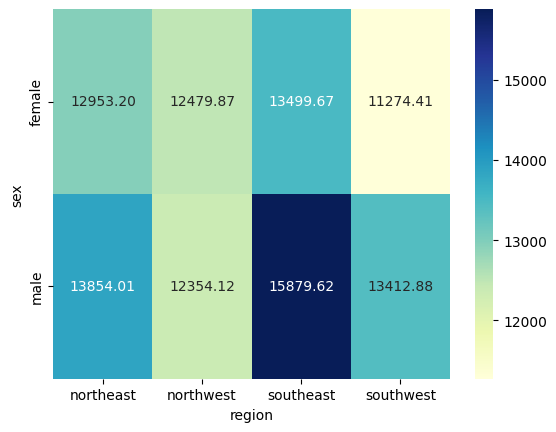

In [126]:
# 열지도 시각화
#sns.heatmap(agg2_wide)

sns.heatmap(agg2_wide, cmap='YlGnBu', annot=True, fmt='.2f')

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

#### [실습] df_sp 활용

1. 'race/ethnicity', 'parental level of education'별 'math score'의 평균을 피벗테이블로 계산
2. 1.의 결과를 열지도로 시각화

In [ ]:
df_sp.head()

In [127]:
pt = df_sp.pivot_table(values='math score', index='race/ethnicity', columns='parental level of education', aggfunc='mean')
pt

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,61.000000,67.166667,60.444444,57.666667,63.888889,58.916667
group B,66.097561,69.300000,59.791667,67.166667,63.189189,61.815789
group C,66.730769,68.150000,60.906250,67.052632,65.130435,60.551020
group D,67.600000,67.571429,62.863636,72.521739,68.731343,66.760000
group E,74.897436,76.555556,70.772727,74.625000,73.828571,72.111111


<Axes: xlabel='parental level of education', ylabel='race/ethnicity'>

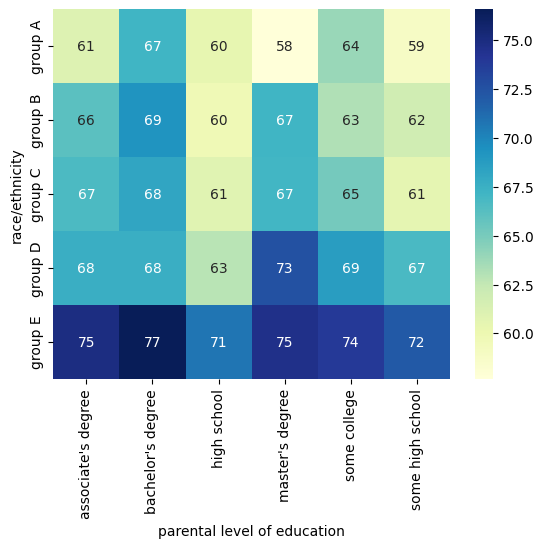

In [128]:
sns.heatmap(pt, cmap='YlGnBu', annot=True)

<br>

## 6. [참고]결과 데이터와 그래프의 저장

함수를 활용해서 분석 결과 데이터와 그래프를 저장 가능

In [129]:
# 폴더 생성
%mkdir result

In [130]:
# 대상 결과 데이터 확인
pt1 = df_ins.pivot_table(index='region', columns='smoker', values='charges', aggfunc='mean')
pt1

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


In [131]:
# to_csv()로 결과 데이터를 csv 형식으로 저장하기
pt1.to_csv('result/result.csv', index=True)

<Axes: xlabel='smoker', ylabel='region'>

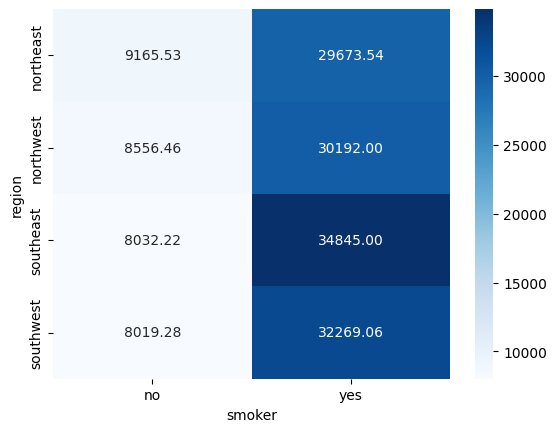

In [132]:
# 대상 그래프 확인
plot1 = sns.heatmap(pt1, cmap='Blues', annot=True, fmt='.2f')
plot1

In [133]:
# savefig()을 활용한 그래프 저장
plot1.figure.savefig('result/plot1.jpg')

#### End of script